In [1]:
#Call the required libraries for analysing and predicting data
import pandas as pd

In [10]:
df1 = pd.read_csv('Churn_Modelling1.csv')

In [11]:
#Displaying the top 5 rows of the dataset
df1.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#**DATASET PREPROCESSING**
We are going to use a dataset which gives information regarding bank customers and their associated features for predicting whether a customer is likely to leave the bank or not

We will import pre-installed libraries for the purpose of exploratory data analysis

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from matplotlib.pyplot import figure, show,suptitle
from scipy import stats

**We now check for missing values in the dataset**

In [13]:
df1.isnull().sum()

RowNumber          0
CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**There are no missing values in any of the columns and we can proceed further 
Check the data type for each column/variable in the dataset**

In [14]:
df1.dtypes

RowNumber            int64
CustomerId           int64
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

1) **CustomerID**: Unique number assigned to each bank customer**

2) **Surname**: Last name of each bank customer

3) **CreditScore**: It is a number that shows the customer's creditworthiness. The higher the score, the better the customer looks to the bank for lending purposes

4) **Geography**: The country from which the customer avails bank services

5) **Gender**: Gender of the Customer

6) **Age**: Age of the Customer

7) **Tenure**: The number of years a customer has been associated with the bank

8) **Balance**: Amount of money a customer holds in the bank

9) **NumOfProducts**: The number of producs the customer has purchased from the bank

10) **HasCrCard**: 0= Customer has no credit card   1= Customer has Credit card

11) **IsActiveMember**: 0= Customer is not using bank services for the past 3 months   1= Customer is using bank services regularly

12) **EstimatedSalary**: The customer's estimated annual salary

13) **Exited**: It shows whether the customer is still a bank client or not

From the above code, we can observe that there are three columns which belong to datatype 'object' and hence are categorical variables.

We will convert **'Gender'** and **'Geography'** columns to numerical variables for the purpose of analysing our dataset. We will ignore column **'Surname'** because this column will have no effect when we analyse the dataset.

**CONVERTING CATEGORICAL VARIABLES TO NUMERICAL VALUES**
- Assign France,Germany and Spain with numerical values 0,1 and 2 respectively
-  0= **France**  1= **Germany**   2= **Spain**
- Assign Male and Female  with numerical values 0 and 1 respectively
-  0= **Male** 1= **Female**


In [15]:
df1['Gender'].replace(['Male', 'Female'], [0, 1], inplace=True)
df1['Geography'].replace(['France', 'Germany', 'Spain'], [0, 1, 2], inplace=True)
df1.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,2,1,43,2,125510.82,1,1,1,79084.10,0


From the table above, we can see that columns **'Geography'** and **'Gender'** now have numerical values

**In the table below,  the key characteristics of the dataset is displayed.**

In [16]:
df1.describe()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,0.746300,0.454300,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,0.000000,0.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**EXPLORATORY DATA ANALYSIS**

After preprocessing the data, we can gain insights through visual exploration about the possible models which can be used to understand the data and make predictions. We can use box plot, count plot, bar graphs et cetera to explore each feature and its relation with other features.

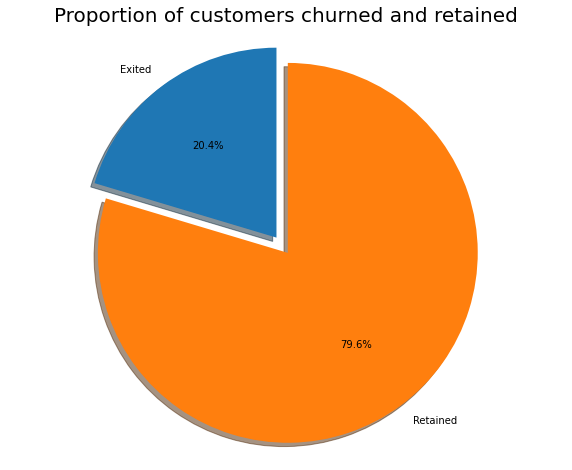

In [17]:
labels = 'Exited', 'Retained'
sizes = [df1.Exited[df1['Exited']==1].count(), df1.Exited[df1['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customers churned and retained", size = 20)
plt.show()

From the above pie chart, it is observed that the bank managed to retain around **80%** of their clients but lost nearly **20%** of its total client base. Going forward, the bank needs to make a deep analysis to know more about the characteristics of the customers who left the bank and the possible reasons behind their exit.

**Customer spread according to Geography**

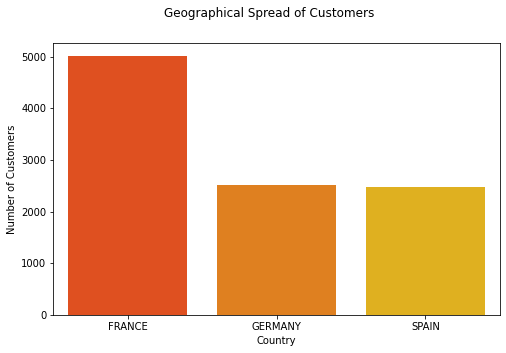

In [18]:
from seaborn import countplot
target="Geography"
figure(figsize=(8,5))
suptitle("Geographical Spread of Customers")
ax = countplot(data=df1,x=target, palette='autumn')
ax.set_xticklabels(["FRANCE","GERMANY","SPAIN"])
ax.set_xlabel("Country")
ax.set_ylabel("Number of Customers")
show()







From the above diagram, it is observed that majority of the customers associated with the bank are from France as compared to Germany and Spain.

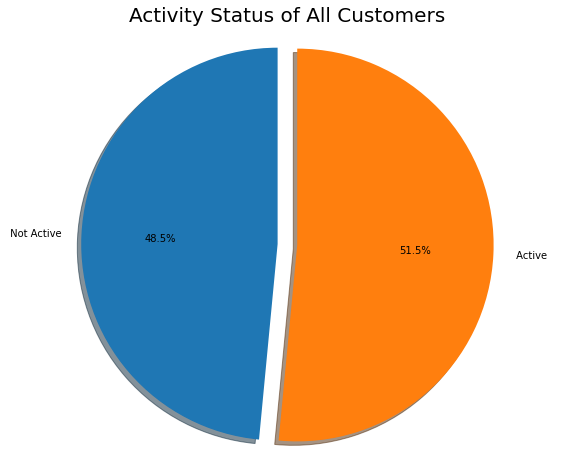

In [19]:


labels = ' Not Active', ' Active'
sizes = [df1.IsActiveMember[df1['IsActiveMember']==0].count(), df1.IsActiveMember[df1['IsActiveMember']==1].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Activity Status of All Customers", size = 20)
plt.show()


show()

From the above diagram, it is observed that approximately **49%** of the total customer base are inactive,which is a worrying statistic for the bank. The bank is bound to face difficulties unless they take measures to entice inactive customers to restart banking services.

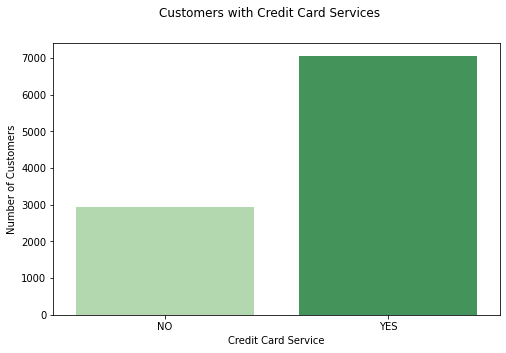

In [20]:
target="HasCrCard"
figure(figsize=(8,5))
suptitle("Customers with Credit Card Services")
ax = countplot(data=df1,x=target, palette='Greens')
ax.set_xticklabels(["NO","YES"])
ax.set_xlabel("Credit Card Service")
ax.set_ylabel("Number of Customers")


show()

In the above graph, it is observed that the bank has a significant amount of clients who have availed their credit card services.

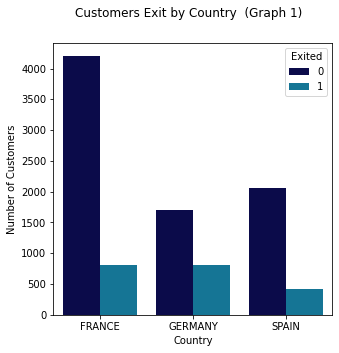

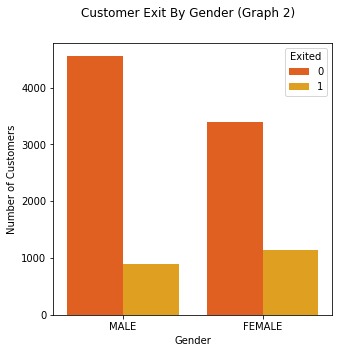

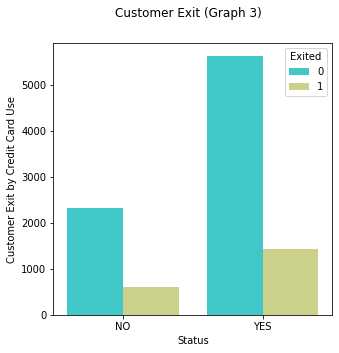

In [21]:
#Customers Exit by Country  (Graph 1)
target="Geography"
figure(figsize=(5,5))
suptitle("Customers Exit by Country  (Graph 1)")
ax = countplot(data=df1,x=target,hue=df1['Exited'],palette= 'ocean')
ax.set_xticklabels(["FRANCE","GERMANY","SPAIN"])
ax.set_xlabel('Country')
ax.set_ylabel('Number of Customers')
show()
#Customer Exit By Gender (Graph 2)
target="Gender"
figure(figsize=(5,5))
suptitle("Customer Exit By Gender (Graph 2)")
ax = countplot(data=df1,x=target,hue=df1['Exited'],palette= 'autumn')
ax.set_xticklabels(["MALE","FEMALE"])
ax.set_xlabel('Gender')
ax.set_ylabel('Number of Customers')
show()
#Customer Exit (Graph 3)
target="HasCrCard"
figure(figsize=(5,5))
suptitle("Customer Exit (Graph 3)")
ax = countplot(data=df1,x=target,hue=df1['Exited'],palette= 'rainbow')
ax.set_xticklabels(["NO","YES"])
ax.set_xlabel('Status')
ax.set_ylabel('Customer Exit by Credit Card Use')
show()




**Note**:  

**0**= Customers who have been retained         **1**= Customers who have left the bank

From the above graphs, the following observations are made:

a) Among the customers who have left the bank, Germany has the highest customers who have left, followed closely by France and Spain respectively.

b) Among the customers who have left the bank, females were most in numner who exited the bank

c) Another surprising observation that was made was the majority of the customers who left the bank were credit card holders issued by the bank.




**Relations of Continuous variables with Customer Attrition/Exit**

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

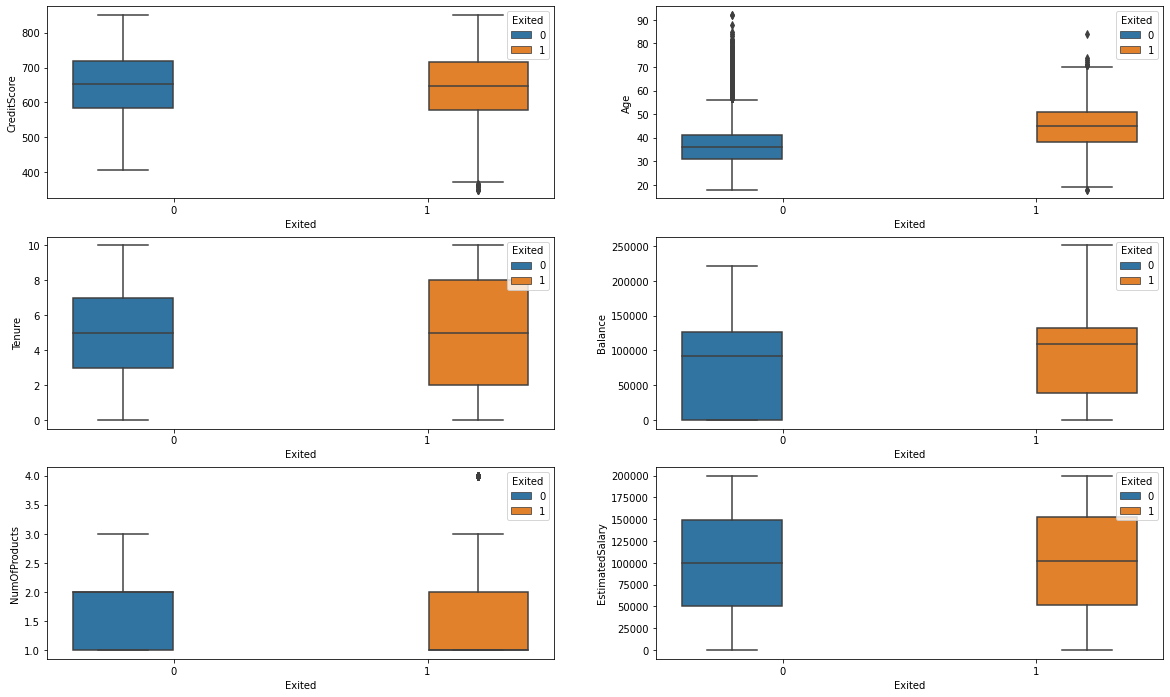

In [22]:
    fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
    sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df1, ax=axarr[0][0])
    sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df1 , ax=axarr[0][1])
    sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df1, ax=axarr[1][0])
    sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df1, ax=axarr[1][1])
    sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df1, ax=axarr[2][0])
    sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df1, ax=axarr[2][1])

The above plots shows the distribution of churned and retained customers with estimated numbers. These categorical attributes have a significant impact on the bank's performance in terms of their ability to retain customers.
For instance, 

1) There is no significant difference between retained and churned customers with respect to Credit Score distribution. 

2) It can be observed that Old age customers are leaving the bank at a rate more than the younger customers. This is proabbly the case because the bank has not managed to provide services that are preferred by old age customers. To solve this issue, the bank may need to go back to the drawing board to review their target markets and modify their services to attract and retain aged customers as well.

3) WIth respect to variable **'Tenure'**, both sets of clients (those who spend a lot of time with the bank or spend little time with the bank) are more likely to leave the bank than those clients having average tenure with the bank.

4) It can be observed that the bank has been losing customers having higher bank balances which unfavourably impacts the bank's capacity to lend

5)Variables such as Products and Salary are less likely to have an impact on the likelihood to churn.

C:\Users\Abraz\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Abraz\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


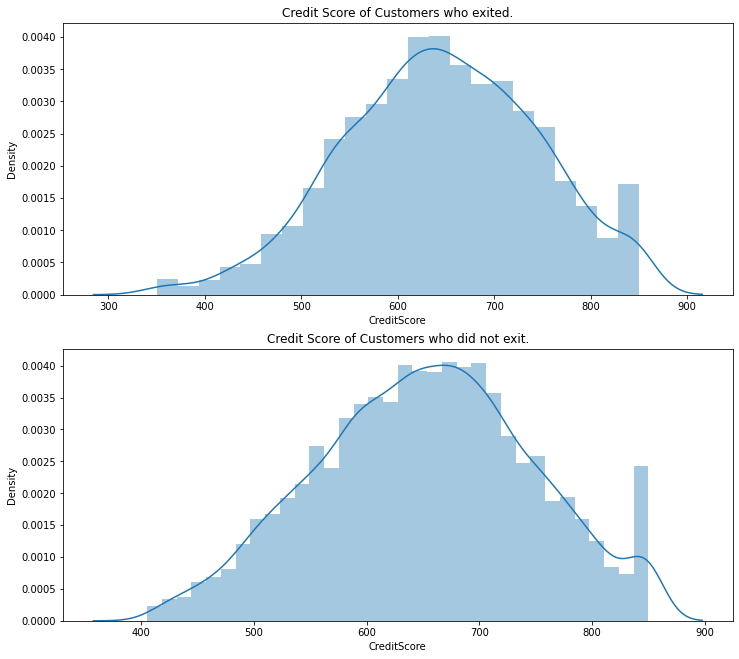

In [23]:
fig, axs = plt.subplots(2, 1, figsize=(12,11))

sns.distplot(df1[df1['Exited'] == 1]['CreditScore'], ax=axs[0])
axs[0].set_title('Credit Score of Customers who exited.')

sns.distplot(df1[df1['Exited'] == 0]['CreditScore'], ax=axs[1])
axs[1].set_title('Credit Score of Customers who did not exit.')

plt.show()

The above plot shows the credit score of customers who have exited and remained and at the bank.It can be seen that customers who have a lower credit score on  average were the ones who left the bank.

C:\Users\Abraz\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


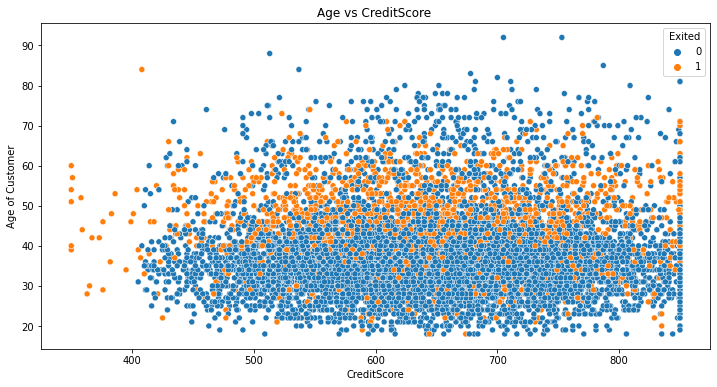

In [24]:
# scatter plot of credit score and age

plt.figure(figsize=(12,6))

sns.scatterplot(df1['CreditScore'],df1['Age'], hue=df1['Exited'])
plt.title('Age vs CreditScore ')
plt.xlabel('CreditScore')
plt.ylabel('Age of Customer')
plt.show()



 



The plot above is a scatterplot of Credit score and Age with each color code showing whether the customers have churned or remained at the bank. It can be observed that the majority of the customers who exited were between 40 and 60 years old. 

**We move to analysing our dataset for the purpose of building models in order to predict the customers who are likely to leave the bank using significant variables present in the dataset**

In the cell below, we will convert categorical variables **'Geography'** and **'Gender'** into numerical values for the purpose of analysis

In [25]:
#One Hot Encoding of Geography and Gender
cate_list = ['Geography', 'Gender']
df1 = pd.get_dummies(df1, columns = cate_list, prefix = cate_list)

In [26]:
df1.head

<bound method NDFrame.head of       RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  \
0             1    15634602          619   42       2       0.00   
1             2    15647311          608   41       1   83807.86   
2             3    15619304          502   42       8  159660.80   
3             4    15701354          699   39       1       0.00   
4             5    15737888          850   43       2  125510.82   
...         ...         ...          ...  ...     ...        ...   
9995       9996    15606229          771   39       5       0.00   
9996       9997    15569892          516   35      10   57369.61   
9997       9998    15584532          709   36       7       0.00   
9998       9999    15682355          772   42       3   75075.31   
9999      10000    15628319          792   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0                 1          1               1        101348.88       1   
1  

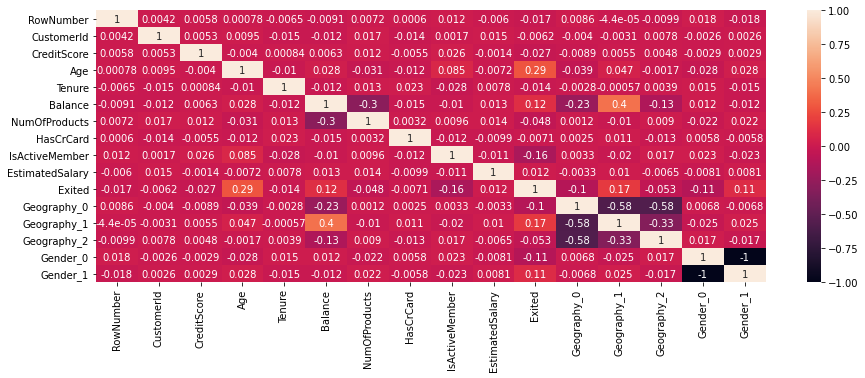

In [27]:
# Create a heatmap to show the corr values between variables
corr = df1.corr()
# add the values
plt.figure(figsize=(15,5))
sns.heatmap(corr, annot=True)
plt.show()

From the above heatmap, the following points are to be noted:

1) Cells with positive values are increasingly correlated to each other and the closer the value to 1.0, there is higher correlation between the two variables

2)Thus, each attribute has a higher correlation with itself, so all the diagonal values are exactly equal to 1.0

3) Those cells having negative values shows that the two variables are inversely related to each other that is, as the value of one variable increases, the value of the other variable decreases and vice-versa

**FEATURE ENGINEERING FOR THE PREDICTIVE MODEL**

In thise section, we will select features/variables that are essential for the purpose of developing a predictive model. We need to know which input variables will give us baseline accuracy. We will also create new features based on the ralationship between attributes and use it with the existing ones for predicting the next client who is likely to churn. 

In the following cell, we will create/standardize some attributes on a head to head basis. For instance, we will create an attribute between **Balance** and **EstimatedSalary** since they are quantitative in nature. Similarly,we will find a ratio between **Tenure** and **CreditScore** over **Age**

In [28]:
# Feature Engineering   (Ratio between variables)
df1['Balance/EstimatedSalary Ratio'] = df1.Balance/(df1.EstimatedSalary)
df1['Tenure/Age'] = df1.Tenure/(df1.Age)
df1['CreditScore/Age'] = df1.CreditScore/(df1.Age)
df1.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_0,Geography_1,Geography_2,Gender_0,Gender_1,Balance/EstimatedSalary Ratio,Tenure/Age,CreditScore/Age
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,0,1,0.000000,0.047619,14.738095
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,0,1,0.744677,0.024390,14.829268
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,0,1,1.401375,0.190476,11.952381
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,0,1,0.000000,0.025641,17.923077
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,0,1,1.587055,0.046512,19.767442


In the following cell, we scale all the variables to calibrate the predictive model for better results.

In [29]:
# MinMax Scaling all variables
vect=['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary','Balance/EstimatedSalary Ratio','Tenure/Age','CreditScore/Age']
minVec = df1[vect].min().copy()
maxVec = df1[vect].max().copy()
df1[vect] = (df1[vect]-minVec)/(maxVec-minVec)
df1.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_0,Geography_1,Geography_2,Gender_0,Gender_1,Balance/EstimatedSalary Ratio,Tenure/Age,CreditScore/Age
0,1,15634602,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0,0,1,0.000000,0.085714,0.235083
1,2,15647311,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1,0,1,0.000070,0.043902,0.237252
2,3,15619304,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0,0,1,0.000132,0.342857,0.168807
3,4,15701354,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0,0,1,0.000000,0.046154,0.310859
4,5,15737888,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1,0,1,0.000150,0.083721,0.354739


In [30]:
# We will also drop column 'Exited' from the table since this is ithe target/dependent variable
# We also split the data into training and test data
from sklearn.model_selection import train_test_split
y = df1['Exited'].values
x = df1.drop(columns = ['Exited'])
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=0)

In [31]:
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = x.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(x)
x = pd.DataFrame(scaler.transform(x))
x.columns = features

In [32]:
#Run Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
result = model.fit(x_train, y_train)
prediction_test = model.predict(x_test)
print (metrics.accuracy_score(y_test, prediction_test))# Accuracy

0.7964




In the above cell, a logistic regression model has been fitted on the training data for the purpose of predicting clients who are likely to churn. This model has an accuracy of 79.6%. We will now run other models and evaluate their accuracy to see which model fits the training data with the best accuracy.


In [33]:
from pandas import Series, DataFrame

In [34]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rfor = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rfor.fit(x_train, y_train)
# Make predictions
prediction_test = model_rfor.predict(x_test)
probs = model_rfor.predict_proba(x_test)
print (metrics.accuracy_score(y_test, prediction_test))# Print the prediction accuracy

0.8668


In the above cell, a random forest regression model has been fitted on the training data for the purpose of predicting clients who are likely to churn. This model has an accuracy of 86.6%. We will now run other models and evaluate their accuracy to see which model fits the training data with the best accuracy.

Age                              0.285077
NumOfProducts                    0.265904
CreditScore/Age                  0.128534
IsActiveMember                   0.076164
Geography_1                      0.054462
Balance                          0.046548
Balance/EstimatedSalary Ratio    0.027058
Tenure/Age                       0.024181
CreditScore                      0.023575
CustomerId                       0.012640
EstimatedSalary                  0.012445
Geography_0                      0.010564
RowNumber                        0.008930
Gender_0                         0.007331
Gender_1                         0.007285
Tenure                           0.004491
Geography_2                      0.004430
HasCrCard                        0.000382
dtype: float64

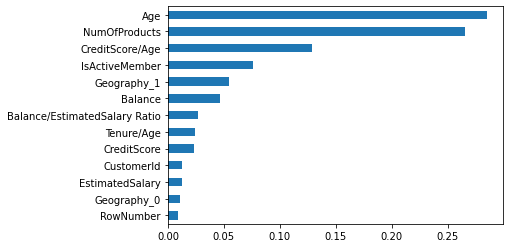

In [35]:
# getting the weights of all the variables on regression model
influence = model_rfor.feature_importances_
weights = pd.Series(influence,
                 index=x.columns.values)
weights.sort_values()[-13:].plot(kind = 'barh')
weights.sort_values(ascending = False)

The above graph shows the influence/weight that each attribute has on the model which is designed to predict the clients who are likely to leave the bank. For instance, attribute **Age** has the highest influence on the prediction model that is, the Age of the customer will be a significant factor in predicting whether a customer will leave the bank or not.

**MODEL TESTING AND VALIDATION**
In the following cells, a prediction list featuring the first five customers who are likely to churn in the near futurewill be displayed using a new dataframe.
**As seen above, Random Forest Models had the ighest accuracy and hence will be used to make the predictions**

In [36]:
# apply on Random forest body and we will directly display five first customers as per our model
x_test["prob_true"] = prediction_test
df_new = x_test[x_test["prob_true"] > 0.9]
display(df_new.head()[["prob_true"]])

,prob_true
8225,1
3497,1
3724,1
6734,1
2932,1


**SUMMARY OF EXPLORATORY DATA ANALYSIS**
After performing all of those visualizations, we now know more about the dataset and the bank customers. The following points have been ascertained from the data:

1-There are twice as many customers from France than from Spain or Germany

2-Germany had the most customers who exited followed by France and Spain


3-There were a higher number of female customers who exited

4-France had the highest number of female customers who exited the bank and Germany had the highest number of Male customers who exited the bank


5-France had the highest female and male customers

6-There is no significant difference in the distribution of both gender's credit scores

7-Customers who exited had a roughly lower average credit score

8-Customers who had a credit card exited more than customers who did not possess a credit card

9-The age distribution of customers who exited looks close to normally distributed while the age distribution of customers who did not exit is positvely skewed.

10-The majority of the people who exited were between 40 and 60 years old

With all of this information, we can ask further questions of the data and explore questions such as:

Why are more female customers leaving the bank?

Are customers with credit cards moving their business to other banks with better rates?

Why are customers in the 40 years - 60 years age range exiting the bank?
Does the bank have a bigger market in France than Spain and Germany based on their customers?


**CONCLUSION**
This study was conducted to use an existing dataset of a bank with the aim of predicting customers who are likely to leave the bank in the near future. Using this predictions, the bank will be able to formulate a strategy to retain these set of customers. After performing an exploratory data anlysis on the existing dataset, we gained an insight in to the bank's current state of affairs; a key observation being that 20% of the bank customers had left the bank. This figure was taken into consideration while deciding the default set o=for the test data which was 25%.

To make the predictions, it was seen that Random Forest Model was the most efficient model in this case with an accuracy of 87%. It is said that every machine learning model is valid and the performance of any model depends on the existing information and the parameters that have been passed. Random Forest has a topology of multiple trees and helps avoiding overfitting. A model can always perform better if the datasets are much larger and more information can beu used to train the model.